<a href="https://colab.research.google.com/github/BrunaFerreira/Mestrado_UNIFESP/blob/main/1_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Bibliotecas a serem utilizadas


In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import os
import PIL
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os
import shutil
from sklearn.model_selection import train_test_split
import random
from sklearn.metrics import roc_auc_score, f1_score, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

## 1. Copiar arquivos do github para Drive pessoal

In [2]:
'''
Copiar arquivos do repositorio publico
--- Abrir uma pasta no Drive
%cd /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code

--- Clonar repositorio
!git clone --filter=blob:none --no-checkout https://github.com/ArsoVukicevic/Assessment-of-pSS-from-SGUS-images.git
!cp -r  Assessment-of-pSS-from-SGUS-images  /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/Assessment-of-pSS-from-SGUS-images

'''

'\nCopiar arquivos do repositorio publico\n--- Abrir uma pasta no Drive\n%cd /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code\n\n--- Clonar repositorio\n!git clone --filter=blob:none --no-checkout https://github.com/ArsoVukicevic/Assessment-of-pSS-from-SGUS-images.git\n!cp -r  Assessment-of-pSS-from-SGUS-images  /content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/Assessment-of-pSS-from-SGUS-images\n\n'

## 2. Leitura dos dados (imagens de glandulas salivares)

In [3]:
dir = "/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code"
df = pd.read_excel(open(dir +'/HarmonicSS_Info.xlsx', 'rb'))
# Renomeia as colunas
df.columns = ['Center','ID','Gland_Type','Machine', 'DeVita_Score', 'Omeract_Score','Sex','Age','Disease_Duration','Label_pSS']
## Retira uma imagem que tem a classificação 2
df = df[df['Label_pSS']!=2]
# Coluna de rótulo convertida para texto
df['Label_pSS'] = df['Label_pSS'].astype(str)
# Inclui zeros a esquerda para o código ID
df['ID'] = df['ID'].apply(lambda x: '{0:0>3}'.format(x))
# Formata o nome do arquivo de cada imagem
df['Image'] = df['ID'].astype(str) + '.jpg'
df_label  = df [['Image','Label_pSS']]
df['Faixa_Etaria'] = np.where(df['Age'] > 40, 'Acima de 40', 'Até 40')
df.head(2)

,Center,ID,Gland_Type,Machine,DeVita_Score,Omeract_Score,Sex,Age,Disease_Duration,Label_pSS,Image,Faixa_Etaria
0,Udine (Italy),001,submandibular,samsung,3,3,F,72.0,18,1,001.jpg,Acima de 40
1,Udine (Italy),002,parotid,samsung,2,3,F,72.0,18,1,002.jpg,Acima de 40


213.jpg


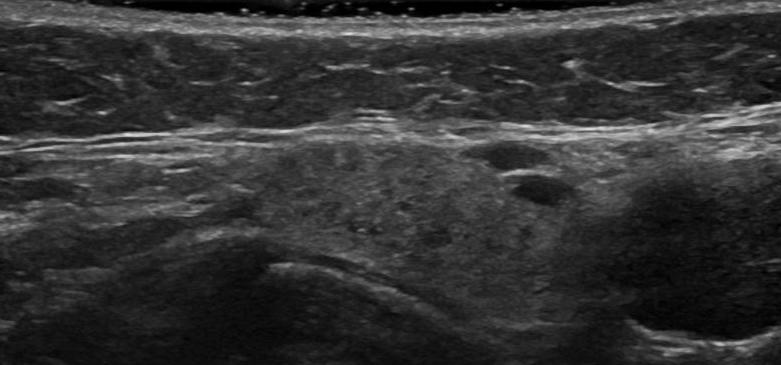

In [4]:
dir = "/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/dataset"
# Exemplo de visualização de uma imagem
img_dir = dir + "/images"
image_extensions = ['.jpg', '.jpeg', '.png']
images = [filename for filename in os.listdir(img_dir) if os.path.splitext(filename)[-1] in image_extensions]
print(images[0])
PIL.Image.open(img_dir + '/' + str(images[0]))

### Distribuição por Genero

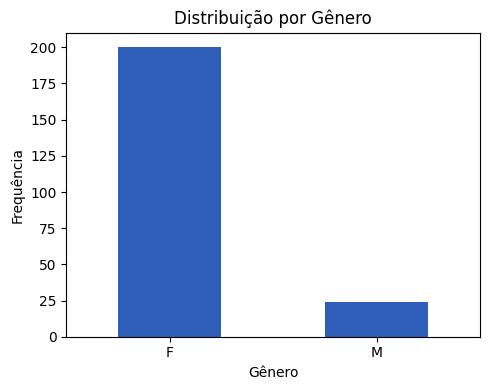

In [5]:
df['Sex'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title('Distribuição por Gênero')
plt.xlabel('Gênero')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.tight_layout()


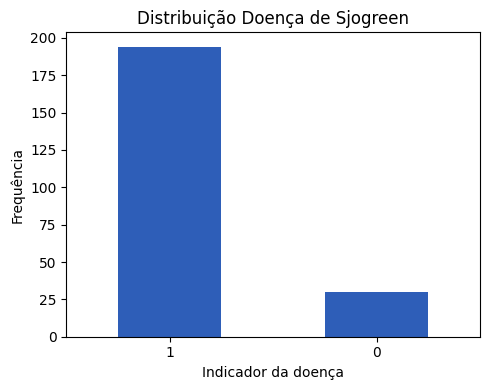

In [6]:
df['Label_pSS'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title('Distribuição Doença de Sjogreen')
plt.xlabel('Indicador da doença')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.tight_layout()

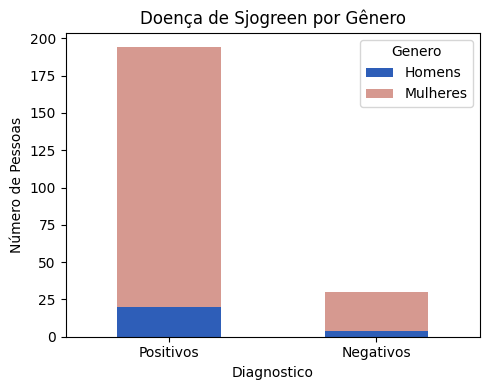

In [7]:
positivos = df[df['Label_pSS'] == '1']['Sex'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Sex'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Homens': [positivos.get('M', 0), negativos.get('M', 0)],
    'Mulheres': [positivos.get('F', 0), negativos.get('F', 0)]
}, index=['Positivos', 'Negativos'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Doença de Sjogreen por Gênero')
plt.xlabel('Diagnostico')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Genero')

plt.tight_layout()


### Distribuição por Idade

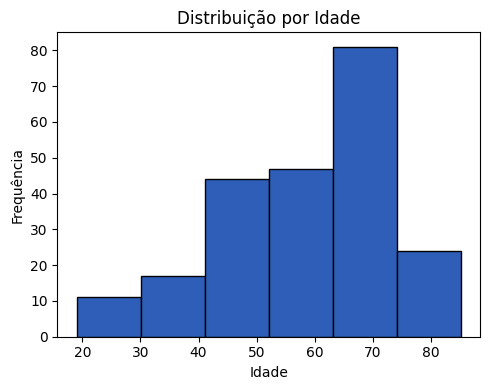

In [8]:
df['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

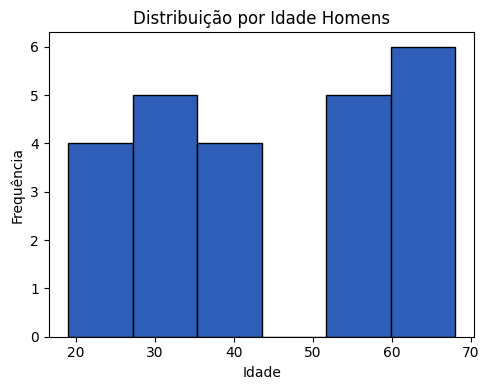

In [9]:
df_M = df[df['Sex'] == 'M']
df_M['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição por Idade Homens')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

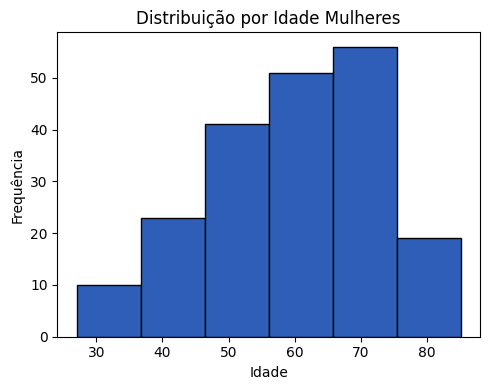

In [10]:
df_F = df[df['Sex'] == 'F']
df_F['Age'].plot(kind='hist', bins=6, edgecolor='black', color=['#2e5eb8'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição por Idade Mulheres')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()

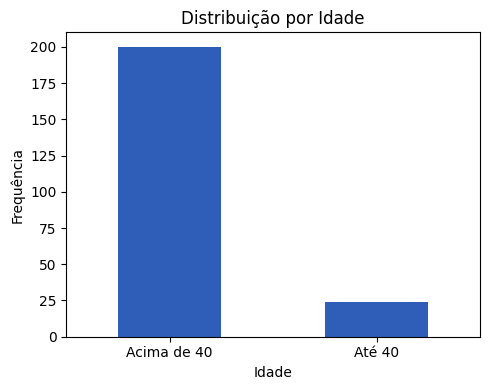

In [11]:
df['Faixa_Etaria'].value_counts().plot(kind='bar', color=['#2e5eb8'], figsize=(5, 4))
plt.title('Distribuição por Idade')
plt.xlabel('Idade')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.tight_layout()

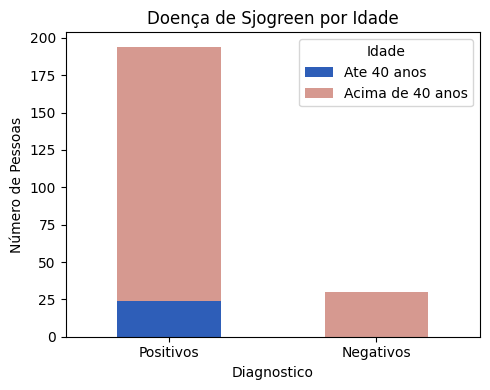

In [12]:
positivos = df[df['Label_pSS'] == '1']['Faixa_Etaria'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Faixa_Etaria'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Ate 40 anos': [positivos.get('Até 40', 0), negativos.get('Até 40', 0)],
    'Acima de 40 anos': [positivos.get('Acima de 40', 0), negativos.get('Acima de 40', 0)]
}, index=['Positivos', 'Negativos'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Doença de Sjogreen por Idade')
plt.xlabel('Diagnostico')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Idade')

plt.tight_layout()



### Paises

In [13]:
df.Center.value_counts()

,count
Center,
Udine (Italy),75
Belgrade (Serbia),53
Ljubljana (Slovenia),49
Milano (Italy),47


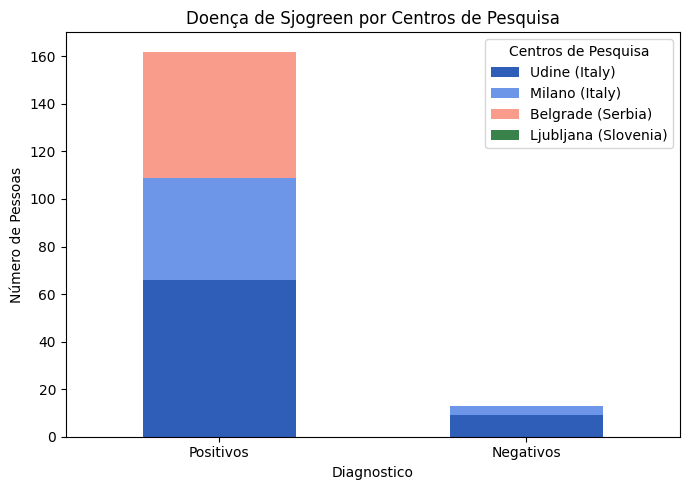

In [14]:
positivos = df[df['Label_pSS'] == '1']['Center'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Center'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Udine (Italy)': [positivos.get('Udine (Italy)', 0), negativos.get('Udine (Italy)', 0)],
    'Milano (Italy)': [positivos.get('Milano (Italy)', 0), negativos.get('Milano (Italy)', 0)],
    'Belgrade (Serbia)': [positivos.get('Belgrade (Serbia)', 0), negativos.get('Belgrade (Serbia)', 0)],
    'Ljubljana (Slovenia)': [positivos.get('Ljubljana (Slovenia)	', 0), negativos.get('Ljubljana (Slovenia)	', 0)]
}, index=['Positivos', 'Negativos'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title('Doença de Sjogreen por Centros de Pesquisa')
plt.xlabel('Diagnostico')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Centros de Pesquisa')

plt.tight_layout()

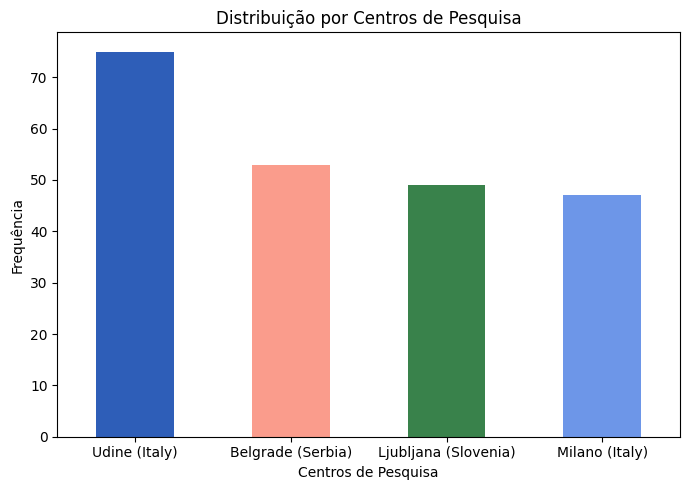

In [15]:
df['Center'].value_counts().plot(kind='bar', figsize=(7, 5), color=['#2e5eb8', '#fa9c8c', '#39824b', '#6d96e8'])
plt.title('Distribuição por Centros de Pesquisa')
plt.xlabel('Centros de Pesquisa')
plt.xticks(rotation=0)
plt.ylabel('Frequência')
plt.tight_layout()


### Scores

In [16]:
df['DeVita_Score'].value_counts()

,count
DeVita_Score,
0,109
2,55
3,32
1,28


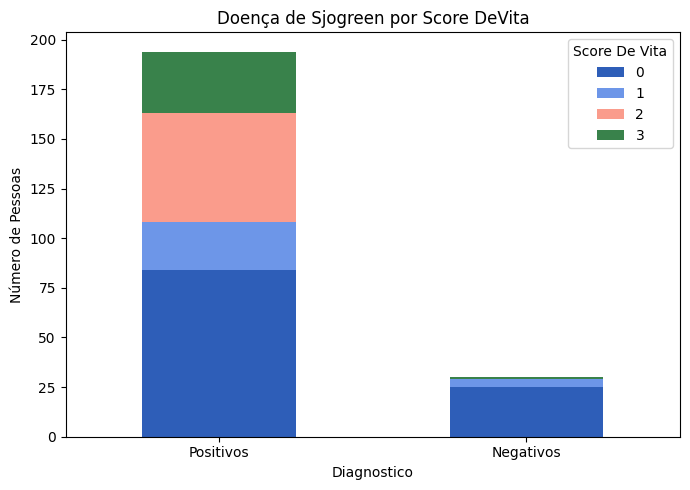

In [17]:
positivos = df[df['Label_pSS'] == '1']['DeVita_Score'].value_counts()
negativos = df[df['Label_pSS'] == '0']['DeVita_Score'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    '0': [positivos.get(0, 0), negativos.get(0, 0)],
    '1': [positivos.get(1, 0), negativos.get(1, 0)],
    '2': [positivos.get(2, 0), negativos.get(2, 0)],
    '3': [positivos.get(3, 0), negativos.get(3, 0)]
}, index=['Positivos', 'Negativos'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title('Doença de Sjogreen por Score DeVita')
plt.xlabel('Diagnostico')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Score De Vita')

plt.tight_layout()

In [18]:
df['Omeract_Score'].value_counts()

,count
Omeract_Score,
0,92
3,53
2,47
1,32


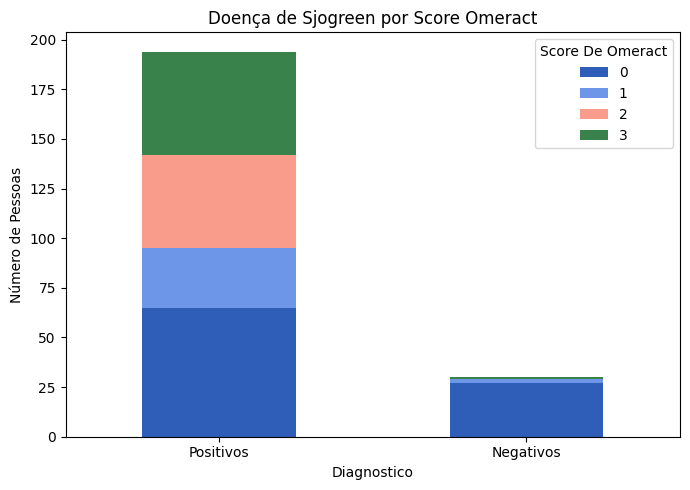

In [19]:
positivos = df[df['Label_pSS'] == '1']['Omeract_Score'].value_counts()
negativos = df[df['Label_pSS'] == '0']['Omeract_Score'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    '0': [positivos.get(0, 0), negativos.get(0, 0)],
    '1': [positivos.get(1, 0), negativos.get(1, 0)],
    '2': [positivos.get(2, 0), negativos.get(2, 0)],
    '3': [positivos.get(3, 0), negativos.get(3, 0)]
}, index=['Positivos', 'Negativos'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#6d96e8','#fa9c8c', '#39824b'], figsize=(7, 5))

# Personalizar gráfico
plt.title('Doença de Sjogreen por Score Omeract')
plt.xlabel('Diagnostico')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Score De Omeract')

plt.tight_layout()

## 3. Pre Processamento

### Separar Treino e Teste

In [20]:
import os
import shutil
import pandas as pd
from sklearn.model_selection import train_test_split

# Caminhos
origem_imagens = dir+"/images"
destino_base = dir

# Divide em treino/teste mantendo o balanceamento por classe
train_df, test_df = train_test_split(df, test_size=0.2, stratify=df['Label_pSS'], random_state=42)

def copiar_imagens(dataframe, tipo):
    for _, row in dataframe.iterrows():
        nome_arquivo = row['Image']
        classe = row['Label_pSS']

        origem = os.path.join(origem_imagens, nome_arquivo)
        if(tipo == 'train'):
          destino_dir = os.path.join(destino_base, tipo, classe)
        else:
          destino_dir = os.path.join(destino_base, tipo)

        os.makedirs(destino_dir, exist_ok=True)
        destino = os.path.join(destino_dir, nome_arquivo)
        shutil.copy2(origem, destino)

# Copiando
copiar_imagens(train_df, 'train')
copiar_imagens(test_df, 'test')

In [21]:
train_df['Base'] = 'train'
test_df['Base'] = 'test'

#Concatenar dataset
df_concat = pd.concat([train_df, test_df], ignore_index=True)

df_full = pd.merge(df, df_concat, on="Image", how="left")

df_full = pd.merge(df, df_concat[['Image', 'Base']], on="Image", how="left")

### Doença de Sjogren

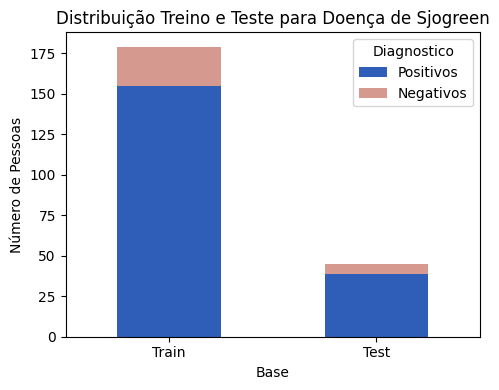

In [22]:
positivos = df_full[df_full['Base'] == 'train']['Label_pSS'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Label_pSS'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Positivos': [positivos.get('1', 0), negativos.get('1', 0)],
    'Negativos': [positivos.get('0', 0), negativos.get('0', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição Treino e Teste para Doença de Sjogreen')
plt.xlabel('Base')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Diagnostico')

plt.tight_layout()

### Distribuição por Genero

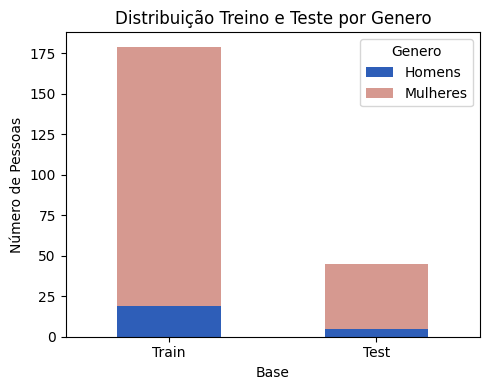

In [23]:
positivos = df_full[df_full['Base'] == 'train']['Sex'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Sex'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Homens': [positivos.get('M', 0), negativos.get('M', 0)],
    'Mulheres': [positivos.get('F', 0), negativos.get('F', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição Treino e Teste por Genero')
plt.xlabel('Base')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Genero')

plt.tight_layout()

### Distribuição por idade

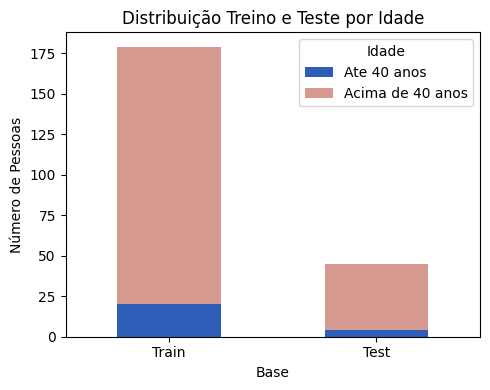

In [24]:
positivos = df_full[df_full['Base'] == 'train']['Faixa_Etaria'].value_counts()
negativos = df_full[df_full['Base'] == 'test']['Faixa_Etaria'].value_counts()

# Criar DataFrame para gráfico
data = pd.DataFrame({
    'Ate 40 anos': [positivos.get('Até 40', 0), negativos.get('Até 40', 0)],
    'Acima de 40 anos': [positivos.get('Acima de 40', 0), negativos.get('Acima de 40', 0)]
}, index=['Train', 'Test'])
data.plot(kind='bar', stacked=True, color=['#2e5eb8', '#d69990'], figsize=(5, 4))

# Personalizar gráfico
plt.title('Distribuição Treino e Teste por Idade')
plt.xlabel('Base')
plt.ylabel('Número de Pessoas')
plt.xticks(rotation=0)
plt.legend(title='Idade')

plt.tight_layout()

## Export Files

In [25]:
df_full.to_csv('/content/drive/MyDrive/0_Mestrado_unifesp/3_Pesquisa/Experimentos/Code/HarmonicSS_Split.csv', index=False)